<a href="https://colab.research.google.com/github/UlasDeveci/UlasDeveci/blob/main/Sinusoidal%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

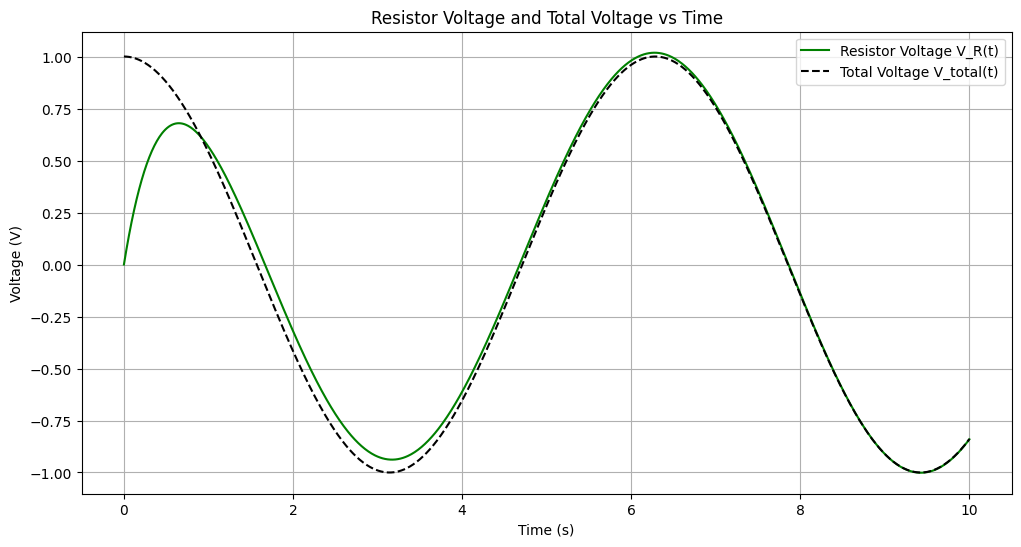

In [26]:
import math
import matplotlib.pyplot as mpl_p

# Parametreler
# RLC devresinin parametreleri
L = 2.0  # İndüktans (H)
R = 5.0  # Direnç (ohm)
C = 0.5  # Kapasitans (F)
V0 = 1.0  # AC kaynağının genliği (V)
Vm = 5   # Maksimum kaynak gerilimi
final_time = 20.0  # Son zaman
omega = 1.0  # AC kaynağının açısal frekansı (rad/s)

# Diferansiyel denklem
def rlc(t, Q, I):
    dQdt = I
    dIdt = (V0 * math.cos(omega * t) - Q / C - R * I) / L
    return dQdt, dIdt

# Başlangıç koşulları
Q0 = 0.0
I0 = 0.0

# Zaman aralığı
t_start = 0
t_end = 10  # Daha kısa bir süre dilimi seçelim ki detaylar net olsun
num_points = 1000
dt = (t_end - t_start) / num_points

# Zaman dizisi
t_values = [t_start + i * dt for i in range(num_points + 1)]

# Euler yöntemi ile çözüm
Q_values = [Q0]
I_values = [I0]

for t in t_values[:-1]:
    dQdt, dIdt = rlc(t, Q_values[-1], I_values[-1])
    Q_values.append(Q_values[-1] + dQdt * dt)
    I_values.append(I_values[-1] + dIdt * dt)

# Voltajların hesaplanması
V_R_values = [R * I for I in I_values]
V_total_values = [V0 * math.cos(omega * t) for t in t_values]  # Kaynak voltajı

# Grafik
mpl_p.figure(figsize=(12, 6))

# Direnç ve Toplam Voltaj grafiği
mpl_p.plot(t_values, V_R_values, label='Resistor Voltage V_R(t)', color='g')
mpl_p.plot(t_values, V_total_values, label='Total Voltage V_total(t)', color='k', linestyle='--')
mpl_p.title('Resistor Voltage and Total Voltage vs Time')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Voltage (V)')
mpl_p.legend()
mpl_p.grid(True)

mpl_p.show()
